## NetCDF basics in Python

1. Read data from a NetCDF file
2. Create a simple contour plot

In [1]:
# core scientific libraries
import os
import numpy as np
import pandas as pd
import xarray as xr
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# secondary libraries
import netCDF4 as nc

/opt/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
pwd

'/home/sarahd/pyclivac/examples'

In [3]:
## import module example_function.py

import sys
## this will need to be updated to your path to your modules folder
#sys.path.append('/home/sbarc/students/nash/repositories/pyclivac_master/functions')
sys.path.append('/home/sarahd/pyclivac/modules')
sys.path

from function_example import date_range

In [4]:
## test date_range function

test_list_dates = date_range('1997-01-01', '1997-01-31', '%Y-%M-%d', 1, 'days')
test_list_dates

array([datetime.datetime(1997, 1, 1, 0, 1),
       datetime.datetime(1997, 1, 2, 0, 1),
       datetime.datetime(1997, 1, 3, 0, 1),
       datetime.datetime(1997, 1, 4, 0, 1),
       datetime.datetime(1997, 1, 5, 0, 1),
       datetime.datetime(1997, 1, 6, 0, 1),
       datetime.datetime(1997, 1, 7, 0, 1),
       datetime.datetime(1997, 1, 8, 0, 1),
       datetime.datetime(1997, 1, 9, 0, 1),
       datetime.datetime(1997, 1, 10, 0, 1),
       datetime.datetime(1997, 1, 11, 0, 1),
       datetime.datetime(1997, 1, 12, 0, 1),
       datetime.datetime(1997, 1, 13, 0, 1),
       datetime.datetime(1997, 1, 14, 0, 1),
       datetime.datetime(1997, 1, 15, 0, 1),
       datetime.datetime(1997, 1, 16, 0, 1),
       datetime.datetime(1997, 1, 17, 0, 1),
       datetime.datetime(1997, 1, 18, 0, 1),
       datetime.datetime(1997, 1, 19, 0, 1),
       datetime.datetime(1997, 1, 20, 0, 1),
       datetime.datetime(1997, 1, 21, 0, 1),
       datetime.datetime(1997, 1, 22, 0, 1),
       datetime.dat

### Reading data from a NetCDF file

In [5]:
# Set filepath
datdir = '../sample-data/'
filename = 'erai.mon.t2m.2000-2005.nc'
filepath = datdir + filename
print(filepath, '\n')

# Open NetCDF Dataset object
f = nc.Dataset(filepath,'r')

# List variable names
print("Variables:")
print(f.variables.keys(),'\n')

# Show dimension names and sizes
print("Dimensions:")
print(f.dimensions.items(),'\n')

# Print all file metadata
#print(f)   # or run 'ncdump -h <filename>' in terminal

../sample-data/erai.mon.t2m.2000-2005.nc 

Variables:
odict_keys(['longitude', 'latitude', 'time', 't2m']) 

Dimensions:
odict_items([('longitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 480
), ('latitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 241
), ('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 72
)]) 



In [24]:
# Read the variables
lons = f.variables['longitude'][:] # [:] syntax stores data in np arrays
lats = f.variables['latitude'][:]
t2m  = f.variables['t2m'][:]
time = f.variables['time']

# Inspect your data
print(lats.shape, lons.shape) # print array sizes
print(t2m.shape)  
print(lats[0:10])  # print some values

# Retrieve attributes
t2m_units    = f.variables['t2m'].units
t2m_longname = f.variables['t2m'].long_name
t2m_missing  = f.variables['t2m'].missing_value
print(t2m_longname)

(241,) (480,)
(72, 241, 480)
[90.   89.25 88.5  87.75 87.   86.25 85.5  84.75 84.   83.25]
2 metre temperature


### Time coordinate handling

**`num2date(`**`times, units, calendar='standard')`: <br>
converts numeric time values to datetime objects, given the specified `units` and `calendar`. Units are generally written in the format `"hours since YY:MM:DD hh-mm-ss"` or "\{time unit\} since \{some reference time\}"

**`date2num(`**`dates, units, calendar='standard')`: <br>
converts datetime objects to numeric values of time (the reverse of num2date)


In [7]:
# convert times to a datetime object
time_units = f.variables['time'].units
dates = nc.num2date(time[:], time_units)

### Simple arithmetic operations

In [8]:
# Long-term time average
t2m_mean = np.mean(t2m, axis=0)
print(t2m_mean.shape)


(241, 480)


### Contour plot
Using Cartopy with Matplotlib

Plotting resources:
* [Cartopy projection list](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#cartopy-projections)
* [Matplotlib colormaps](https://matplotlib.org/tutorials/colors/colormaps.html)

In [9]:
# projection
# transform

# mapcrs - what want in
# datacrs - what comes in

In [21]:
def simple_contour_plot (data, lons, lats, proj= ccrs.PlateCarree(), title = '', colormap='YlOrRd'
                        #, data units
                        ):

    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1, projection=proj)

    p = ax.contourf(lons, lats, data, transform=proj,
                cmap = colormap, extend='both')
    
    ax.coastlines()
    ax.gridlines()
    plt.title(title)
    
    cbar = plt.colorbar(p, orientation='horizontal',
                    shrink=0.85, pad=0.05, 
                   # label=data_units
                       )
    
    plt.show()

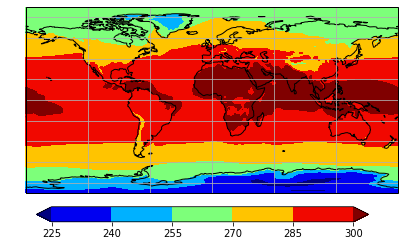

In [22]:
simple_contour_plot (t2m_mean, lons, lats, colormap = 'jet')

In [ ]:
# Data for plotting
data = t2m_mean

# Set map projection
proj = ccrs.PlateCarree()

# Set up figure and axes
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add data
p = ax.contourf(lons, lats, data, transform=proj,
                cmap='YlOrRd', extend='both')

# Add plot elements
ax.coastlines()
ax.gridlines()
plt.title('Average 2m Temperature (2000-2005)')

# Add colorbar
cbar = plt.colorbar(p, orientation='horizontal',
                    shrink=0.85, pad=0.05, 
                    label=t2m_units)

# Save to file
plt.savefig('plotfile.png')

# Show plot
plt.show()